2. Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [5]:
data.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [6]:
# проверим пропуски
data['DUQ_MW'].isnull().sum()

0

Пропусков нет

Text(0, 0.5, 'МВт')

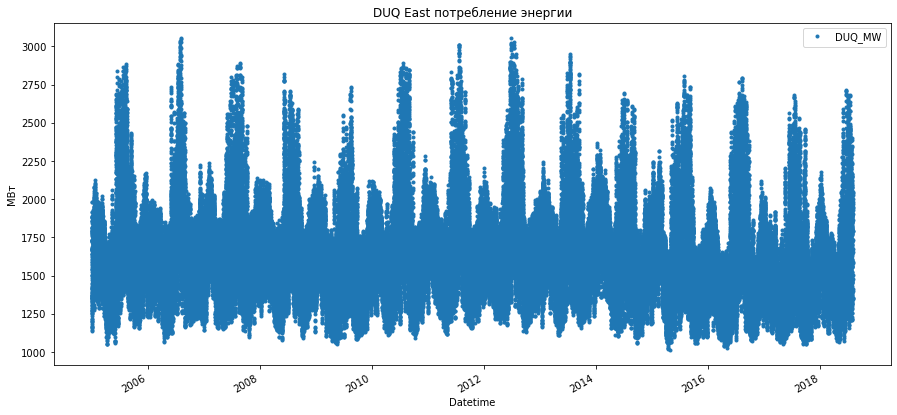

In [7]:
data.plot( style = '.', figsize = ( 15, 7 ), title = 'DUQ East потребление энергии' )
plt.ylabel ( 'МВт' )

In [8]:
data['date'] = data.index
data.head()

,DUQ_MW,date
Datetime,,
2005-12-31 01:00:00,1458.0,2005-12-31 01:00:00
2005-12-31 02:00:00,1377.0,2005-12-31 02:00:00
2005-12-31 03:00:00,1351.0,2005-12-31 03:00:00
2005-12-31 04:00:00,1336.0,2005-12-31 04:00:00
2005-12-31 05:00:00,1356.0,2005-12-31 05:00:00


In [9]:
ut = data['date'].unique()
print('число уникальных значений:   ',ut.shape[0],' : число наблюдений : ', data.shape[0])

число уникальных значений:    119064  : число наблюдений :  119068


Число уникальных значений меньше числа наблюдений. Имеет место дублирование  показаний.

In [10]:
count_data = data['date'].value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: date, dtype: int64

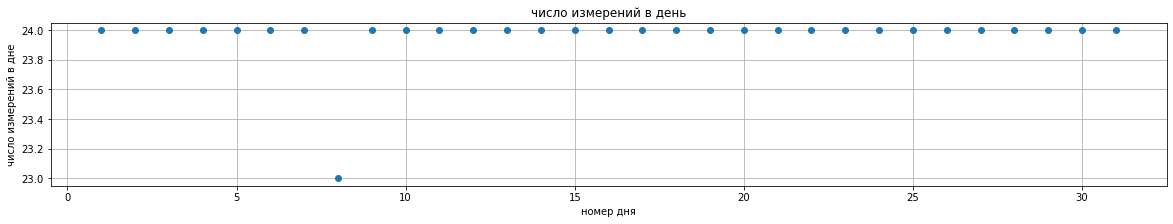

In [11]:
day_H=data['2015-03-01 00:00:00':'2015-03-31 23:00:00'].index.day

plt.figure(figsize=(20,3))
plt.plot(day_H.value_counts().index, day_H.value_counts().values ,'o')

plt.xlabel('номер дня')
plt.ylabel('число измерений в дне')
plt.title('число измерений в день')
plt.grid()
plt.show()

In [12]:
Day_count = day_H.value_counts() 
Day_count[Day_count != 24]

8    23
Name: Datetime, dtype: int64

Судя по всему, имеет место переход на зимнее/летнее время.

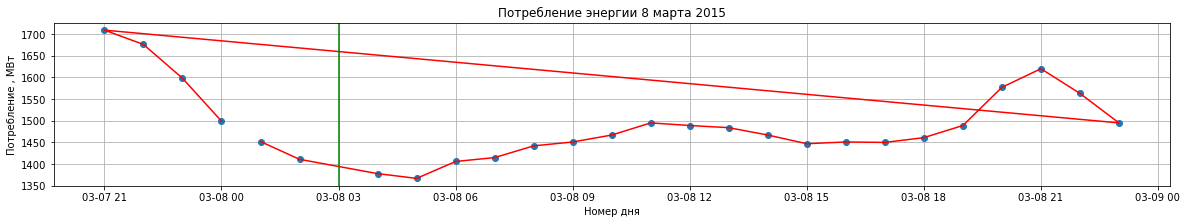

In [13]:
plt.figure(figsize=(20,3))
plt.plot(data['2015-03-07 21:00:00':'2015-03-08 23:00:00'].index,
         data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'o')
plt.plot(data['2015-03-07 21:00:00':'2015-03-08 23:00:00'].index,
         data['2015-03-07 21:00:00':'2015-03-08 23:00:00']['DUQ_MW'].values, 'r')

plt.axvline(pd.to_datetime('2015-03-08 03:00:00'), color = 'green')
plt.xlabel('Номер дня')
plt.ylabel('Потребление , МВт')
plt.title('Потребление энергии 8 марта 2015')
plt.grid()

plt.show()

А также нужно отсортировать данные по времени.

3. Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

In [14]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [15]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


Text(0.5, 0, 't')

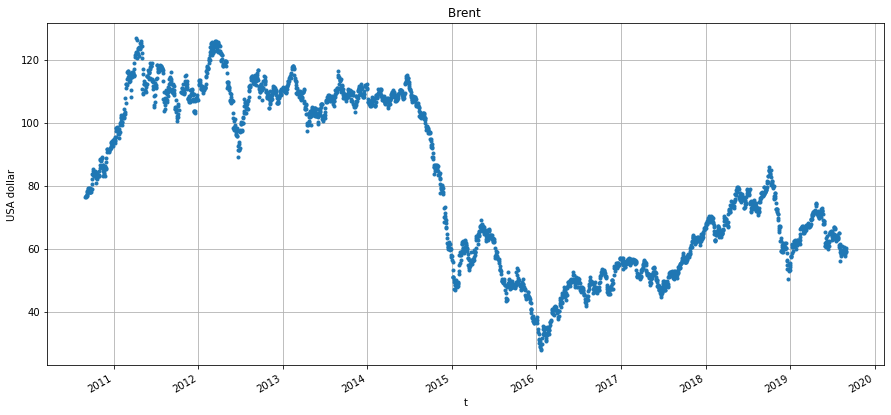

In [16]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.grid()
plt.xlabel('t')

In [17]:
brent_data_weeks_mean = brent_data.resample("W").mean()
brent_data_weeks_mean.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [18]:
brent_data_months_mean = brent_data.resample("M").mean()
brent_data_months_mean.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


4. Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [31]:
brent_data_years_mean = brent_data.resample("Y").mean()
brent_data_years_mean.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


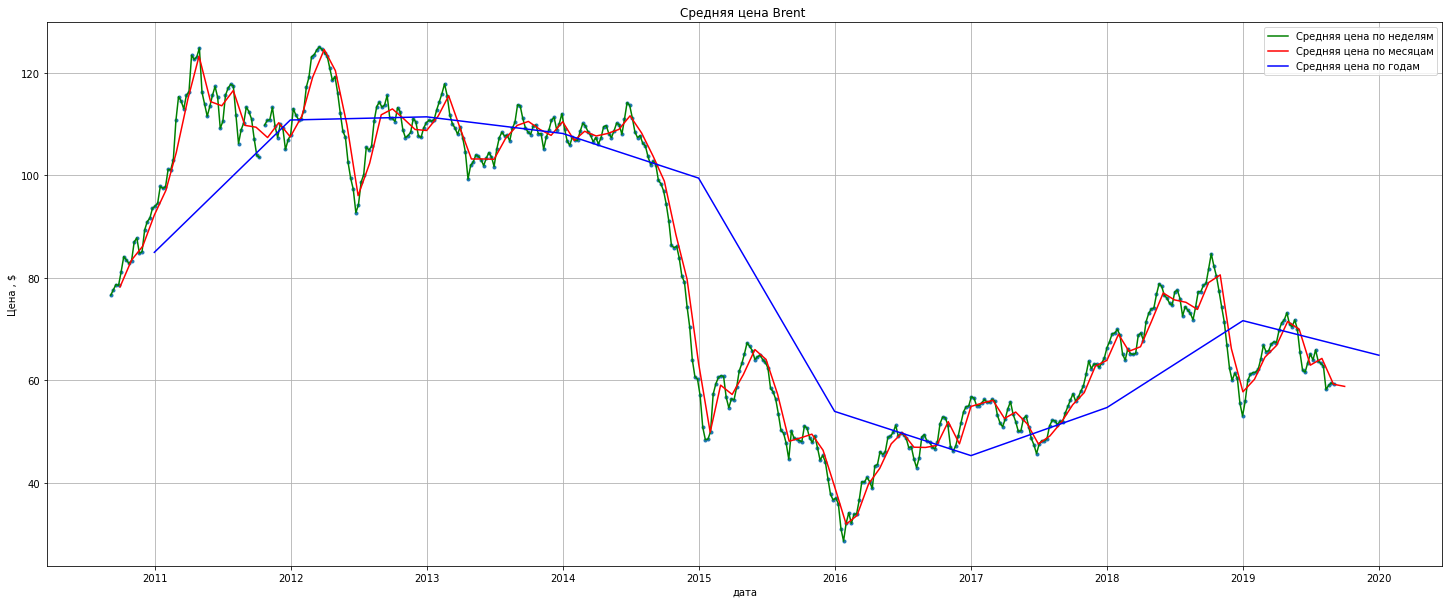

In [39]:
plt.figure(figsize=(25,10))
plt.plot(brent_data_weeks_mean.index, brent_data_weeks_mean.values, '.')
plt.plot(brent_data_weeks_mean.index, brent_data_weeks_mean.values, 'r', color='green', label='Средняя цена по неделям')

plt.plot(brent_data_months_mean.index, brent_data_months_mean.values, color='red', label='Средняя цена по месяцам')

plt.plot(brent_data_years_mean.index, brent_data_years_mean.values, color='blue', label='Средняя цена по годам')


plt.xlabel('дата')
plt.ylabel('Цена , $')
plt.title('Средняя цена Brent ')
plt.legend()
plt.grid()

plt.show()

In [33]:
brent_data_weeks_std = brent_data.resample("W").std()
brent_data_weeks_std.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


In [34]:
brent_data_months_std = brent_data.resample("M").std()
brent_data_months_std.head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


In [35]:
brent_data_years_std = brent_data.resample("Y").std()
brent_data_years_std.head()

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923


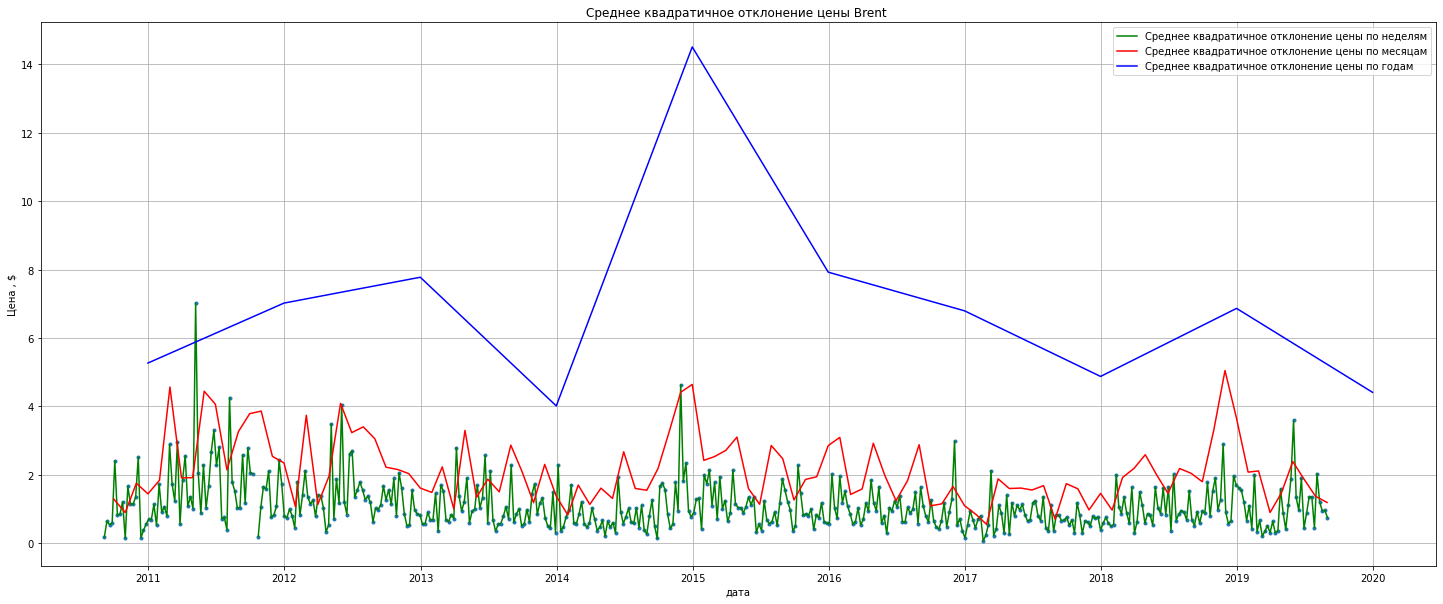

In [40]:
plt.figure(figsize=(25,10))
plt.plot(brent_data_weeks_std.index, brent_data_weeks_std.values, '.')
plt.plot(brent_data_weeks_std.index, brent_data_weeks_std.values, 'r', color='green', label='Среднее квадратичное отклонение цены по неделям')

plt.plot(brent_data_months_std.index, brent_data_months_std.values, 'r', color='red', label='Среднее квадратичное отклонение цены по месяцам')

plt.plot(brent_data_years_std.index, brent_data_years_std.values, 'r', color='blue', label='Среднее квадратичное отклонение цены по годам')


plt.xlabel('дата')
plt.ylabel('Цена , $')
plt.title('Среднее квадратичное отклонение цены Brent ')
plt.legend()
plt.grid()

plt.show()

5. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

Общая тенденция сохранилась, но имеет место сглаживание кривой.